## Titanic Survival Predictions
In this dataset, we will train a logistic regression model that can predict the survivors based on a set of features about the passenger. For more information about the data: https://www.kaggle.com/c/titanic/data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis
The data is split into two files: Test and Train. Load both and find out the number of samples and features in each file

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
print("Test Dataset:")
test.columns
test.info()

print("Train Dataset:")
train.columns
train.info()

Test Dataset:


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
Train Dataset:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


How many survivors in the traning set?

In [3]:
print("There are", train.Survived.sum(),"survivors in the dataset.")

There are 342 survivors in the dataset.


Let's find Jack and Rose in the data? Use a code. You probably won't find them as they were fictional character. See if you can find Beatrice Irene Sandstorm? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [4]:
find_jack = (test['Name'] == "Jack%")
test[find_jack]

find_rose = (test['Name'] == 'Rose%')
test[find_rose]

find_Beatrice = (test['Name']).str.contains("Beatrice")
test[find_Beatrice]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7,G6,S


### Do features make a difference?
In the training dataset: 
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex — What was the survival rate of women?
- SibSp — What was the survival rate based on number of siblings the passenger had on the ship?
- Parch — What was the survival rate based on number of parents/children the passenger had on the ship?

In [5]:
survived =train[train.Survived == 1]
#survived

# First Class Survivors: 
first_class = (survived['Pclass']) == 1
first_class_survived = survived[first_class]
print("First Class Survivors: ",first_class_survived['Pclass'].count())

# Second Class Survivors: 
second_class = (survived['Pclass']) ==2
second_class_survived = survived[second_class]
print("Second Class Survivors: ",second_class_survived['Pclass'].count())

# Third Class Survivors: 
third_class = (survived['Pclass']) ==3
third_class_survived = survived[third_class]
print("Third Class Survivors:", third_class_survived['Pclass'].count())

First Class Survivors:  136
Second Class Survivors:  87
Third Class Survivors: 119


In [6]:
# Sex — What was the survival rate of women?
sex = train.groupby('Sex').Survived.sum()
sex
print("Survival rate based on sex:", sex/train.groupby('Sex').Survived.count())

Sex
female    233
male      109
Name: Survived, dtype: int64

Survival rate based on sex: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [7]:
#SibSp—What was the survival rate based on number of siblings the passenger had on the ship?

#survived =train[train.Survived == 1] #number of people that survived, not filtered by num of Siblings
Number_of_Siblings=train.SibSp.unique()
Number_of_Siblings

total_zero = train[train['SibSp'] == 0] # number of passengers with 0 siblings
#total_zero.count()
siblings_zero = survived['SibSp']== 0 # passengers w/ zero siblings that survived
No_sib = survived[siblings_zero]
#none.count()
survival_zero = No_sib.count() / total_zero.count()
print("Survival Rate for passensgers who had 0 siblings:", survival_zero['SibSp'])

total_one = train[train['SibSp'] == 1]
#total_one.count()
siblings_one = survived['SibSp']== 1
sib_one = survived[siblings_one]
#sib_one.count()
One_Sib = sib_one.count()/total_one.count()
print("Survival Rate for passensgers who had 1 siblings:", One_Sib['SibSp'])

total_two = train[train['SibSp'] == 2]
#total_one.count()
siblings_two = survived['SibSp']== 2
sib_two = survived[siblings_two]
#sib_one.count()
Two_Sib = sib_two.count()/total_two.count()
print("Survival Rate for passensgers who had 2 siblings:",Two_Sib['SibSp'])

total_three = train[train['SibSp'] == 3]
#total_one.count()
siblings_three = survived['SibSp']== 3
sib_three = survived[siblings_three]
#sib_one.count()
Three_Sib = sib_three.count() / total_three.count()
print("Survival Rate for passensgers who had 3 siblings:",Three_Sib['SibSp'])

total_four = train[train['SibSp'] == 4]
#total_one.count()
siblings_four = survived['SibSp']== 4
sib_four = survived[siblings_four]
#sib_one.count()
four_Sib = sib_four.count() / total_four.count()
print("Survival Rate for passensgers who had 4 siblings:",four_Sib['SibSp'])

total_five = train[train['SibSp'] == 5]
#total_one.count()
siblings_five = survived['SibSp']== 5
sib_five = survived[siblings_five]
#sib_one.count()
five_Sib = sib_five.count() / total_five.count()
print("Survival Rate for passensgers who had 5 siblings:",five_Sib['SibSp'])

total_eight = train[train['SibSp'] == 8]
#total_one.count()
siblings_eight = survived['SibSp']== 8
sib_eight = survived[siblings_eight]
#sib_one.count()
eight_Sib = sib_eight.count() / total_eight.count()
print("Survival Rate for passensgers who had 8 siblings:",eight_Sib['SibSp'])

array([1, 0, 3, 4, 2, 5, 8])

Survival Rate for passensgers who had 0 siblings: 0.34539473684210525
Survival Rate for passensgers who had 1 siblings: 0.5358851674641149
Survival Rate for passensgers who had 2 siblings: 0.4642857142857143
Survival Rate for passensgers who had 3 siblings: 0.25
Survival Rate for passensgers who had 4 siblings: 0.16666666666666666
Survival Rate for passensgers who had 5 siblings: 0.0
Survival Rate for passensgers who had 8 siblings: 0.0


In [8]:
#Parch— What was the survival rate based on number of parents/children the passenger had on the ship?
Number_of_Parch = train.Parch.unique()
Number_of_Parch

total_zero = train[train['Parch'] == 0]
parch_zero = survived['Parch']== 0
parch_zero = survived[parch_zero]
Zero_Parch = parch_zero.count()/total_zero.count()
print("Survival Rate for passensgers who had 0 parent/children:", Zero_Parch['SibSp'])

total_one = train[train['Parch'] == 1]
parch_one = survived['Parch']== 1
parch_one = survived[parch_one]
One_Parch = parch_one.count()/total_one.count()
print("Survival Rate for passensgers who had 1 parent/children:", One_Parch['SibSp'])

total_two = train[train['Parch'] == 2]
parch_two = survived['Parch']== 2
parch_two = survived[parch_two]
Two_Parch = parch_two.count()/total_two.count()
print("Survival Rate for passensgers who had 2 parent/children:", Two_Parch['SibSp'])

total_three = train[train['Parch'] == 3]
parch_three = survived['Parch']== 3
parch_three = survived[parch_three]
Three_Parch = parch_three.count() / total_three.count()
print("Survival Rate for passensgers who had 3 parent/children:", Three_Parch['SibSp'])

total_4 = train[train['Parch'] == 4]
parch_4 = survived['Parch']== 4
parch_4 = survived[parch_4]
Four_Parch = parch_4.count() / total_4.count()
print("Survival Rate for passensgers who had 4 parent/children:", Four_Parch['SibSp'])

total_5 = train[train['Parch'] == 5]
parch_5 = survived['Parch']== 5
parch_5 = survived[parch_5]
Five_Parch = parch_5.count() / total_5.count()
print("Survival Rate for passensgers who had 5 parent/children:", Five_Parch['SibSp'])

total_6 = train[train['Parch'] == 6]
parch_6 = survived['Parch']== 6
parch_6 = survived[parch_6]
Six_Parch = parch_6.count() / total_6.count()
print("Survival Rate for passensgers who had 6 parent/children:", Six_Parch['SibSp'])

array([0, 1, 2, 5, 3, 4, 6])

Survival Rate for passensgers who had 0 parent/children: 0.34365781710914456
Survival Rate for passensgers who had 1 parent/children: 0.5508474576271186
Survival Rate for passensgers who had 2 parent/children: 0.5
Survival Rate for passensgers who had 3 parent/children: 0.6
Survival Rate for passensgers who had 4 parent/children: 0.0
Survival Rate for passensgers who had 5 parent/children: 0.2
Survival Rate for passensgers who had 6 parent/children: 0.0


Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram by Age that Survived')

<Figure size 432x288 with 0 Axes>

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram by Age that Did Not Survive')

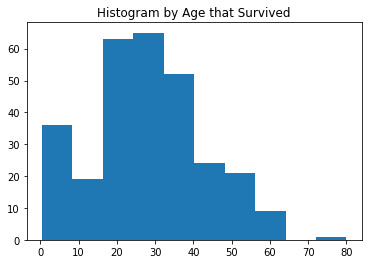

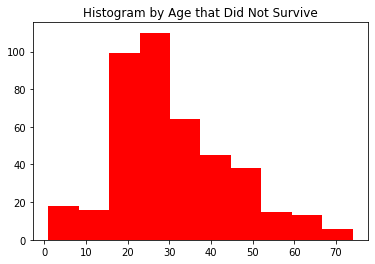

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#survived = train[train.survived ==1]
x = survived['Age']
#x.count()
plt.hist(x)
plt.title("Histogram by Age that Survived")

not_survived = train[train.Survived == 0 ]
x_not = not_survived['Age']
#x_not.count()
plt.figure()
plt.hist(x_not, color= "red")
plt.title("Histogram by Age that Did Not Survive")

#According to the histogram was Jack more likely to survive or not survive and why?
# Jack was 20 years old when he was in the ship the Titanic. 
# According to the histogram Jack would not have survived as there are more 20 year olds that did 
# not survive, approximately 100, versus 20 year olds that did survive was 

Divide the age histograms on a 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

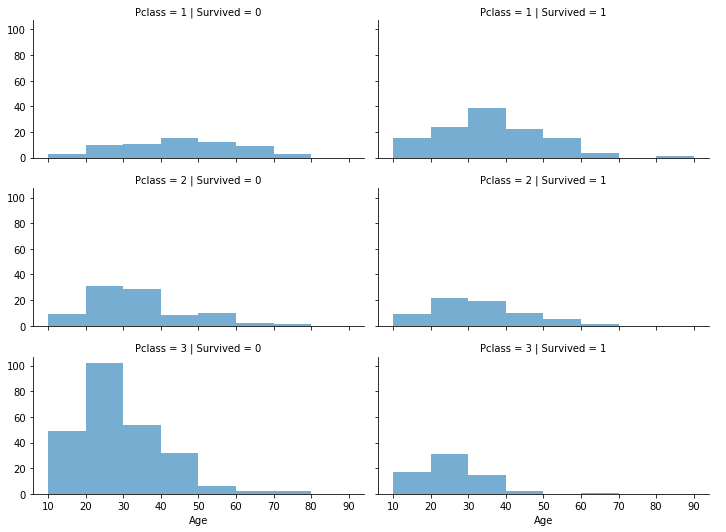

In [10]:
import seaborn as sns
bins = [10,20,30,40,50,60,70,80,90]
Age= train['Age']
plots = sns.FacetGrid(train,col = 'Survived', row ='Pclass', size= 2.5, aspect= 2.0)
plots.map(plt.hist, 'Age', alpha= .6, bins = bins)
plots.add_legend()

## Fix missing Data in the Training Dataset
Which features in the training contains missing values? and how many missing values are there?

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Find out the age median grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [12]:
print("The number of Nans in age:",train.Age.isna().sum())
median_age_grouped= train.groupby(['Pclass', 'Sex'])['Age'].median()
print(median_age_grouped)
for p in train.Pclass.unique(): 
    train.Age[(train.Pclass==p) & (train.Age.isna()) & (train.Sex=='male')] = median_age_grouped[p]['male']
    train.Age[(train.Pclass==p) & (train.Age.isna()) & (train.Sex=='female')] = median_age_grouped[p]['female']   

# let's see how many nan's we have now
print("The number of Nans in age:",train.Age.isna().sum())

The number of Nans in age: 177
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
The number of Nans in age: 0


For the Embarked column, substitute the missing value with the highest occurance value among the entire dataset

In [13]:
train.isnull().sum() # Before
train.Embarked[train.Embarked.isna()]=train.Embarked.value_counts().idxmax()
train.isnull().sum() # After 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Let's do our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [14]:
train.drop(columns = ['Cabin','Name','Ticket','PassengerId'], inplace = True)

Make sure now that your data does not have any nulls

In [15]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

In [16]:
train.head(15)
train['Embarked']=train['Embarked'].astype('category').cat.codes
train['Embarked'].dtypes
train['Sex']= train['Sex'].astype('category').cat.codes
train['Sex'].dtypes
train.isna().sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,25.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


dtype('int8')

dtype('int8')

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

 ## ML Logistic Regression

You are now ready to build a logistic regression model and fit it 

In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# survived or not = that is x 
x = train.drop(columns = ['Survived'], axis = 1)
y = train.Survived
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
model = LogisticRegression().fit(x_scaled, y)

Show the training score. 

In [18]:
model.score(x_scaled,y)

0.8080808080808081

What are the coefficients. Make a plot that shows the importance of each feature in your model

My intercepts and bias are as follows:  [[-0.97497661 -1.27988999 -0.56637168 -0.37452556 -0.07090765  0.09214013
  -0.15339128]] and [-0.64209731]


<BarContainer object of 7 artists>

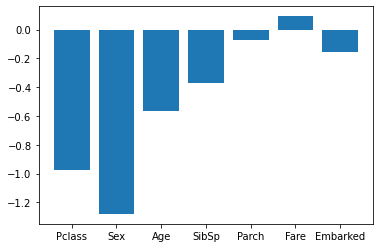

In [19]:
print("My intercepts and bias are as follows: ",model.coef_, "and",model.intercept_)
plt.bar(x.columns, model.coef_[0])

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

In [20]:
# Dropping colunmns not needed for the test dataset
test = test.drop(columns = ['Cabin','Name','Ticket','PassengerId'])
test.head(10)
for p in test.Pclass.unique(): 
    test.Age[(test.Pclass==p) & (test.Age.isna()) & (test.Sex=='male')] = median_age_grouped[p]['male']
    test.Age[(test.Pclass==p) & (test.Age.isna()) & (test.Sex=='female')] = median_age_grouped[p]['female']  
test.isna().sum()

test.Embarked[test.Embarked.isna()]=train.Embarked.value_counts().idxmax()
test.Embarked = test.Embarked.astype('category').cat.codes
test.Sex = test.Sex.astype('category').cat.codes

# getting rid of Nans in fare
Test_median_fare= test['Fare'].groupby([test['Pclass'],test['Sex']]).median()
Test_median_fare.median()
test["Fare"].fillna(Test_median_fare.median(),inplace =True)
test.isnull().sum()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

19.5

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Logistic Regression for Test Data

In [21]:
#scaling my test data 
x_scaled_test = scaler.transform(test)

How many will survive from the test dataset?

In [22]:
pred = model.predict(x_scaled_test)
print("Number of individuals that survived based on test dataset is", sum(pred), "out of", len(pred))

Number of individuals that survived based on test dataset is 156 out of 418
